In [1]:
import json

with open('test1a.json') as f:
   data_test1 = json.load(f)
with open('test2a.json') as f:
   data_test2 = json.load(f)

print(type(data_test1))

<class 'dict'>


In [2]:
print(data_test1.keys())
print(type(data_test1['pages']))

x1 = data_test1['pages'][0]['words']
x2 = data_test1['pages'][0]['words']

word_detail_list1 = []
word_detail_list2 = []

def create_word_detail_list(x, word_detail_list):
    for i in x:
        if i['text'] is not None:
            word_detail_list.append(i)

create_word_detail_list(x1, word_detail_list1)
create_word_detail_list(x2, word_detail_list2)


word_text_list1 = []
word_text_list2 = []

def create_word_text_list(x, word_text_list):
    for i in x:
        if i['text'] is not None:
            word_text_list.append(i['text'])

create_word_text_list(x1, word_text_list1)
create_word_text_list(x2, word_text_list2)

word_vertex_list1 = []
word_vertex_list2 = []

def create_word_vertex_list(x, word_vertex_list):
    for i in x:
        if i['text'] is not None:
            q = i['boundingBox']['vertices'][0]['x']
            w = i['boundingBox']['vertices'][0]['y']
            word_vertex_list.append((q,w))

create_word_vertex_list(x1, word_vertex_list1)
create_word_vertex_list(x2, word_vertex_list2)

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

better_words_text_list1 = []
better_words_text_list2 = []

def create_better_words_text_list(word_text_list, better_words_text_list):
    for i in word_text_list:
        if i not in stop_words:
            better_words_text_list.append(i)

create_better_words_text_list(word_text_list1, better_words_text_list1)
create_better_words_text_list(word_text_list2, better_words_text_list2)

# def create_better_words_text_list(word_text_list):
#     a = []
#     for i in word_text_list:
#         if i not in stop_words:
#             a.append(i)
#     return a

# better_words_text_list1 = create_better_words_text_list(word_text_list1)
# better_words_text_list2 = create_better_words_text_list(word_text_list2)

popularity_index_dict = {}

def train_pid(word_text_list):
    for i in word_text_list:
        if i in popularity_index_dict:
            popularity_index_dict[i] += 1
        else:
            popularity_index_dict[i] = 1

train_pid(better_words_text_list1)
train_pid(better_words_text_list2)

# print(popularity_index_dict['Page'])

test_final_word_list = [x for x in popularity_index_dict if popularity_index_dict[x] >= 2]

# from string import punctuation
# print(punctuation)

punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
print(punctuation)

test_final_word_list_re = []

for i in test_final_word_list:
    if not (any(chr.isdigit() for chr in i)):
        if not (any(p in i for p in punctuation)):
            test_final_word_list_re.append(i)

print(len(test_final_word_list_re),test_final_word_list_re)



dict_keys(['transactionId', 'ocrClient', 'extractionType', 'pages'])
<class 'list'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
99 ['Page', 'No', 'HDFC', 'BANK', 'Account', 'Branch', 'CHANDA', 'NAGAR', 'We', 'understand', 'world', 'Address', 'GROUND', 'A', 'K', 'BESIDE', 'ELEPHONE', 'MICRO', 'TECHNOLOGIES', 'City', 'HYDERABAD', 'State', 'TELANGANA', 'HNO', 'Phone', 'SHOP', 'NO', 'CHINNAM', 'BALAJI', 'OD', 'Limit', 'TOWERS', 'Currency', 'INR', 'Email', 'Cust', 'ID', 'ANDHRA', 'PRADESH', 'INDIA', 'CAGEN', 'Open', 'Date', 'JOINT', 'Status', 'Regular', 'MICR', 'Code', 'Product', 'Registered', 'From', 'To', 'Statement', 'account', 'CARDS SETTL', 'IB', 'FUNDS', 'TRANSFER', 'EDC', 'RENTAL', 'NEFT', 'ABDUL', 'IMPS', 'CARDS', 'SETTL', 'CASH', 'DEP', 'LIMITED', 'Closing', 'balance', 'includes', 'funds', 'earmarked', 'hold', 'uncleared', 'Contents', 'statement', 'considered', 'correct', 'error', 'reported', 'within', 'days', 'receipt', 'The', 'address', 'record', 'Bank', 'day', 'requesting', 'Service', 'Tax

In [3]:
pre_image_check_word_detail_list1 = []
pre_image_check_word_detail_list2 = []

def create_final_word_detail_list(word_detail_list, pre_image_check_word_detail_list):
    for i in word_detail_list:
        if i['text'] in test_final_word_list_re:
            pre_image_check_word_detail_list.append(i)

create_final_word_detail_list(word_detail_list1, pre_image_check_word_detail_list1)
create_final_word_detail_list(word_detail_list2, pre_image_check_word_detail_list2)

print('pre_image_check_word_detail_list - ',len(pre_image_check_word_detail_list1), len(pre_image_check_word_detail_list2))

pre_image_check_word_vertex_list1 = []
pre_image_check_word_vertex_list2 = []

create_word_vertex_list(pre_image_check_word_detail_list1, pre_image_check_word_vertex_list1)
create_word_vertex_list(pre_image_check_word_detail_list2, pre_image_check_word_vertex_list2)

print('pre_image_check_word_vertex_list - ', len(pre_image_check_word_vertex_list1), len(pre_image_check_word_vertex_list2))

pre_image_check_word_detail_list -  137 137
pre_image_check_word_vertex_list -  137 137


In [4]:
def dist_cal(x1,y1, x2,y2):
    return (((x1-x2)**2)+((y1-y2)**2))**0.5

# word_vertex_list = [(1,1), (2,1), (1,3)]
def vertexl_to_graph(v):
    l = len(v)
    g = []
    for i in range(l):
        g.append([])
        for j in range(l):
            c = dist_cal(*v[i], *v[j])
            g[i].append(c)
    return g

print(len(pre_image_check_word_vertex_list1), len(pre_image_check_word_vertex_list2))

pre_image_check_word_graph1 = vertexl_to_graph(pre_image_check_word_vertex_list1)
pre_image_check_word_graph2 = vertexl_to_graph(pre_image_check_word_vertex_list2)

print(len(pre_image_check_word_graph1), len(pre_image_check_word_graph1[0]), type(pre_image_check_word_graph1))


137 137
137 137 <class 'list'>


In [36]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def tsp(pre_image_check_word_graph):
    output_tsp_sol_order_for_image = []          
    
    def create_data_model(pre_image_check_word_graph):
        """Stores the data for the problem."""
    #     ex1 = create_random_vertex_list(50)
    #     ex2 = vertexl_to_graph(ex1)

        data = {}
        data['distance_matrix'] = pre_image_check_word_graph #ex2
        data['num_vehicles'] = 1
        data['depot'] = 0
        return data


    def print_solution(manager, routing, solution, output_tsp_sol_order_for_image):
        sol_list = []                                                  #Added later
        """Prints solution on console."""
        print('Objective: {} miles'.format(solution.ObjectiveValue()))
        index = routing.Start(0)
        plan_output = 'Route for vehicle 0:\n'
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            sol_list.append(manager.IndexToNode(index))                 #Added later
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
        plan_output += ' {}\n'.format(manager.IndexToNode(index))
        print(plan_output)
        plan_output += 'Route distance: {}miles\n'.format(route_distance)
        print('list - out - ', sol_list)                                 #Added later
        return sol_list

    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model(pre_image_check_word_graph1)                   #Added later

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""

        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        output_tsp_sol_order_for_image = print_solution(manager, routing, solution, output_tsp_sol_order_for_image)  #Edited Later
        print('output_tsp_sol_order_for_image - ', len(output_tsp_sol_order_for_image))
    
    return output_tsp_sol_order_for_image

tsp_output_list_order1 = tsp(pre_image_check_word_graph1)
tsp_output_list_order2 = tsp(pre_image_check_word_graph2)



Objective: 18315 miles
Route for vehicle 0:
 0 -> 1 -> 4 -> 11 -> 5 -> 21 -> 23 -> 28 -> 34 -> 33 -> 38 -> 40 -> 42 -> 47 -> 53 -> 57 -> 64 -> 58 -> 54 -> 51 -> 48 -> 50 -> 43 -> 39 -> 24 -> 22 -> 17 -> 15 -> 12 -> 6 -> 7 -> 16 -> 18 -> 13 -> 14 -> 49 -> 56 -> 60 -> 59 -> 55 -> 65 -> 122 -> 121 -> 120 -> 119 -> 118 -> 117 -> 116 -> 106 -> 115 -> 114 -> 105 -> 113 -> 129 -> 136 -> 135 -> 128 -> 104 -> 112 -> 111 -> 134 -> 103 -> 110 -> 133 -> 132 -> 127 -> 126 -> 108 -> 125 -> 131 -> 124 -> 130 -> 123 -> 107 -> 99 -> 96 -> 100 -> 97 -> 92 -> 89 -> 90 -> 91 -> 94 -> 93 -> 98 -> 101 -> 109 -> 102 -> 95 -> 88 -> 87 -> 86 -> 85 -> 84 -> 83 -> 82 -> 81 -> 80 -> 79 -> 77 -> 78 -> 76 -> 75 -> 74 -> 72 -> 73 -> 71 -> 68 -> 69 -> 70 -> 67 -> 66 -> 63 -> 61 -> 62 -> 52 -> 44 -> 41 -> 35 -> 29 -> 25 -> 30 -> 36 -> 45 -> 46 -> 32 -> 27 -> 37 -> 31 -> 20 -> 26 -> 19 -> 8 -> 9 -> 2 -> 3 -> 10 -> 0

list - out -  [0, 1, 4, 11, 5, 21, 23, 28, 34, 33, 38, 40, 42, 47, 53, 57, 64, 58, 54, 51, 48, 50, 43, 

In [39]:
vertex_list_for_image_plot1 = []
vertex_list_for_image_plot2 = []


# print(tsp_output_list_order1)
for i in tsp_output_list_order1:
    vertex_list_for_image_plot1.append(pre_image_check_word_vertex_list1[i])
for i in tsp_output_list_order2:
    vertex_list_for_image_plot2.append(pre_image_check_word_vertex_list2[i])


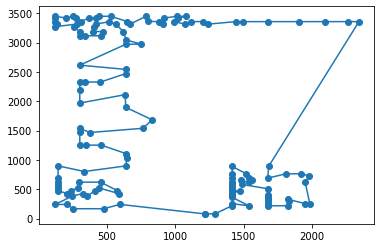

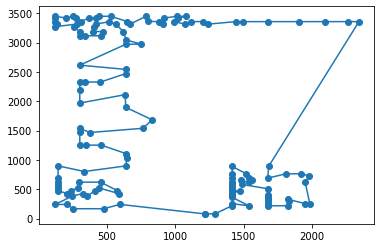

In [43]:
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# ex3 = create_random_vertex_list(10)

# for points in [vertex_list_for_image_plot1, vertex_list_for_image_plot2]:
#     plt.plot(*zip(*(points+points[:1])), marker='o')
#     automin, automax = plt.xlim()
#     plt.xlim(automin-0.5, automax+0.5)
#     automin, automax = plt.ylim()
#     plt.ylim(automin-0.5, automax+0.5)

#     plt.show()
plt.plot(*zip(*(vertex_list_for_image_plot1 + vertex_list_for_image_plot1[:1])), marker='o')
automin, automax = plt.xlim()
plt.xlim(automin-0.5, automax+0.5)
automin, automax = plt.ylim()
plt.ylim(automin-0.5, automax+0.5)
plt.savefig("{}.png".format('test_tspplot1'))
plt.show()

plt.plot(*zip(*(vertex_list_for_image_plot2 + vertex_list_for_image_plot2[:1])), marker='o')
automin, automax = plt.xlim()
plt.xlim(automin-0.5, automax+0.5)
automin, automax = plt.ylim()
plt.ylim(automin-0.5, automax+0.5)
plt.savefig("{}.png".format('test_tspplot2'))
plt.show()

In [44]:
"""
Comparing images using ORB/SIFT feature detectors
and structural similarity index.
"""


from skimage.metrics import structural_similarity
import cv2

#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

img00 = cv2.imread('rec1.png', 0)
img01 = cv2.imread('recomp1.png', 0)

img1 = cv2.imread('test_tspplot1.png', 0)  # 714 x 901 pixels
# img2 = cv2.imread('images/BSE_noisy.png', 0)  # 714 x 901 pixels
img3 = cv2.imread('test_tspplot2.png', 0)  # 203 x 256 pixels
# img4 = cv2.imread('images/different_img.png', 0)  # 203 x 256 pixels

orb_similarity = orb_sim(img1, img3)  #1.0 means identical. Lower = not similar

print("Similarity using ORB is: ", orb_similarity)
#Resize for SSIM
from skimage.transform import resize
img5 = resize(img3, (img1.shape[0], img1.shape[1]), anti_aliasing=True, preserve_range=True)

ssim = structural_sim(img1, img5) #1.0 means identical. Lower = not similar
print("Similarity using SSIM is: ", ssim)

Similarity using ORB is:  1.0
Similarity using SSIM is:  1.0


C:\Users\riddh\anaconda3\envs\BDS\lib\site-packages\skimage\_shared\utils.py:293: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
